# prophet_A厂

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
df = pd.read_csv('../data/train.csv')
df.columns=['date','A','B']
df.date = pd.to_datetime(df.date)
df_A = df[['date','A']]
df_A.columns=['ds','y']

In [2]:

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true))) 

In [3]:
df_A1 = df_A

m = Prophet(changepoint_prior_scale=0.15,
            seasonality_prior_scale=0.5,)
m.fit(df_A1)

future = m.make_future_dataframe(periods=151)

future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1181,2021-03-27,195724.723030,159928.474752,228856.722482
1182,2021-03-28,197645.236291,163485.078097,228678.211840
1183,2021-03-29,198802.670999,163437.052286,232022.419067
1184,2021-03-30,199888.498348,165432.079452,231091.896036
1185,2021-03-31,201219.901244,168110.353761,236277.169500


0.1335387159442118

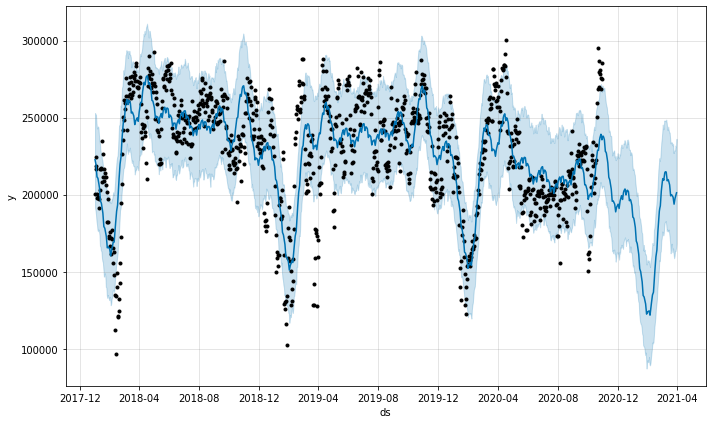

In [4]:
#changepoint_prior_scale=0.5
fig1 = m.plot(forecast)
mape(df_A[(df_A['ds']>='2020-10-01')&(df_A['ds']<='2020-10-31')][['y']],forecast[(forecast['ds']>='2020-10-01')&(forecast['ds']<='2020-10-31')][['yhat_upper']])

In [ ]:
#保存结果
forecast[(forecast['ds']>='2020-11-01')][['yhat_upper']].to_csv('A_pre_prophet.csv',index=False)

# prophet_B厂

In [5]:
df = pd.read_csv('../data/train.csv')
df.columns=['date','A','B']
df.date = pd.to_datetime(df.date)
df_A = df[['date','B']]
df_A.columns=['ds','y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1181,2021-03-27,167441.546034,137724.375150,196399.568890
1182,2021-03-28,168006.744574,139538.747169,196746.729627
1183,2021-03-29,170800.050792,141792.749822,199581.500592
1184,2021-03-30,170982.663394,143473.184708,201088.991708
1185,2021-03-31,170840.333095,140826.875585,200518.671047


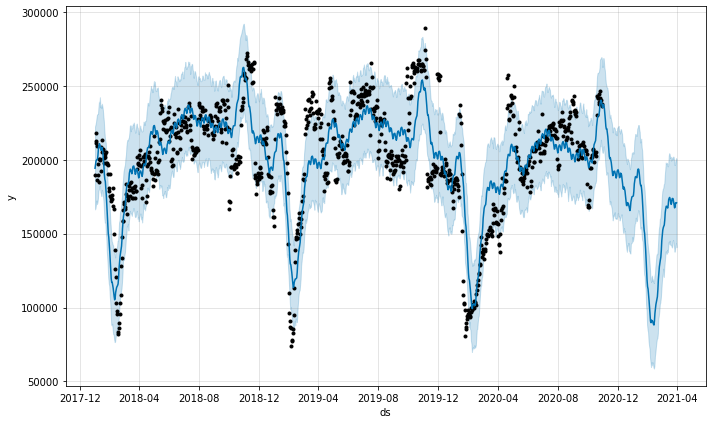

In [6]:
df_A1 = df_A

m = Prophet(changepoint_prior_scale=0.02,
            seasonality_prior_scale=0.2,)
m.fit(df_A1)

future = m.make_future_dataframe(periods=151)

future.tail()

forecast = m.predict(future)

fig1 = m.plot(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [7]:
#changepoint_prior_scale=0.5
mape(df_A[(df_A['ds']>='2020-10-01')&(df_A['ds']<='2020-10-31')][['y']],forecast[(forecast['ds']>='2020-10-01')&(forecast['ds']<='2020-10-31')][['yhat']])

0.048633361189058456

In [ ]:
#保存预测结果
forecast[(forecast['ds']>='2020-11-01')][['yhat_upper']].to_csv('B_pre_prophet.csv',index=False)